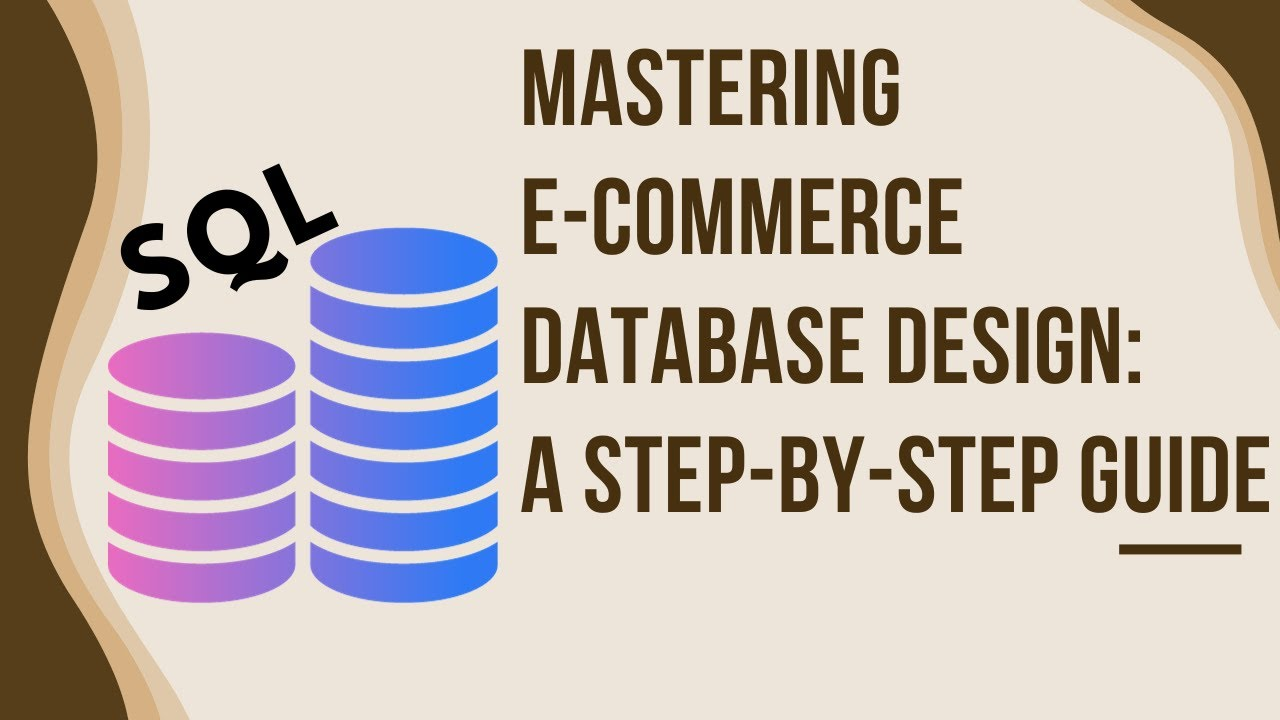

# **Case Study: Dissecting and Designing a Schema for an E-Commerce Platform**

In this case study, we will dissect and design the schema for a leading e-commerce platform, Amazon. We will analyze its core features, the real-world problems it solves, and create a schema that captures its data structure.

## **Step 1: Choose a Leading Platform**
We have chosen Amazon, a top e-commerce platform, for our case study.

## **Step 2: Research**

**Core Features of Amazon:**
1. **User Accounts**: Allows users to create accounts, log in, and manage their profiles.
2. **Product Listings**: A vast catalog of products across various categories.
3. **Shopping Cart**: Users can add products to their cart and manage their orders.
4. **Orders**: Users can place orders, track shipments, and review past purchases.
5. **Reviews and Ratings**: Users can leave reviews and rate products.
6. **Payments**: Secure payment processing for orders.
7. **Recommendations**: Personalized product recommendations based on user behavior.

## **Step 3: Product Dissection and Real World Problems Solved by the Platform**

**Real World Problems Solved by Amazon:**
1. **Convenience**: Amazon provides a one-stop shop for millions of products, saving users time and effort.
2. **Variety and Choice**: Offers an extensive range of products, often more than physical stores.
3. **Price Comparison**: Users can compare prices across different sellers.
4. **User Reviews**: Provides genuine user feedback, helping customers make informed purchasing decisions.
5. **Order Tracking**: Users can track their orders in real-time.
6. **Personalized Experience**: Recommends products based on users' past behavior, enhancing the shopping experience.

## **Step 4: Case Study on the Real World Problems and Approach to Solving Them**

**Problem: Convenience and Variety**
Amazon offers a comprehensive shopping experience by providing a vast product catalog, robust search functionality, and user-friendly navigation. This solves the problem of convenience and lack of variety in traditional shopping.

**Approach:**
- **Product Listings**: Maintains a well-organized product catalog with detailed descriptions, images, and categories.
- **Search and Filters**: Implements powerful search algorithms and filtering options to help users find products quickly.

**Problem: Informed Purchasing Decisions**
Amazon enables users to make informed purchasing decisions through user reviews and ratings, addressing the issue of uncertainty in online shopping.

**Approach:**
- **User Reviews and Ratings**: Allows users to rate products and leave detailed reviews, which are then displayed prominently on product pages.


   

   











## **Step 5: Schema Design Based on Top Features**

Based on the identified features, we will craft a schema design that reflects Amazon's data structure.

### **Entities and Relationships**



1. **User**:
   - Attributes: `user_id`, `name`, `email`, `password`, `address`, `phone_number`, `created_at`, `updated_at`

In [ ]:
CREATE SCHEMA amazon;
USE amazon;
CREATE TABLE User (
    user_id INT AUTO_INCREMENT PRIMARY KEY,
    name VARCHAR(100) NOT NULL,
    email VARCHAR(100) NOT NULL UNIQUE,
    password VARCHAR(255) NOT NULL,
    address VARCHAR(255),
    phone_number VARCHAR(15),
    created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    updated_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP ON UPDATE CURRENT_TIMESTAMP
);

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
INSERT INTO User (name, email, password, address, phone_number)
VALUES
    ('Santosh kumar', 'sk@example.com', 'password123', '292c Noida UP', '+1234567890'),
    ('Uma soni', 'uma@example.com', 'securepwd456', '264 Noida UP', '+1987654321'),
    ('Michael Brown', 'michael.brown@example.com', 'mypass789', '789 Elm Rd, Villagetown', '+1654321876'),
    ('Sarah Johnson', 'sarah.johnson@example.com', 'sarahpass', '567 Pine Blvd, Hamlet City', '+1765432198'),
    ('Kevin Lee', 'kevin.lee@example.com', 'kevinpass123', '890 Maple Ln, Hillside Village', '+1543219876'),
    ('Emily Davis', 'emily.davis@example.com', 'emilypass456', '234 Cedar Dr, Riverside', '+1876543210'),
    ('David Wilson', 'david.wilson@example.com', 'davidpass789', '901 Willow Ave, Lakeside', '+1987456321');


2. **Product**:
   - Attributes: `product_id`, `name`, `description`, `price`, `category`, `stock_quantity`, `created_at`, `updated_at`

In [ ]:
CREATE TABLE Product (
    product_id INT AUTO_INCREMENT PRIMARY KEY,
    name VARCHAR(100) NOT NULL,
    description TEXT,
    price DECIMAL(10 , 2 ) NOT NULL,
    category VARCHAR(100),
    stock_quantity INT NOT NULL,
    created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    updated_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP ON UPDATE CURRENT_TIMESTAMP
);

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
INSERT INTO Product (name, description, price, category, stock_quantity)
VALUES
    ('Laptop', 'High-performance laptop with 16GB RAM and SSD storage', 1299.99, 'Electronics', 50),
    ('Smartphone', 'Latest smartphone with dual cameras and OLED display', 899.99, 'Electronics', 100),
    ('Running Shoes', 'Lightweight running shoes for all-terrain use', 99.99, 'Sports', 200),
    ('Coffee Maker', 'Automatic coffee maker with programmable settings', 149.50, 'Home & Kitchen', 75),
    ('Wireless Earbuds', 'Bluetooth wireless earbuds with noise cancellation', 129.00, 'Electronics', 150),
    ('Yoga Mat', 'Eco-friendly yoga mat with non-slip surface', 49.95, 'Sports', 300),
    ('Backpack', 'Waterproof backpack with multiple compartments', 79.99, 'Travel', 120);


3. **Order**:
   - Attributes: `order_id`, `user_id`, `order_date`, `status`, `total_amount`
   - Relationships: `user_id` references `User(user_id)`

In [ ]:
CREATE TABLE `Order` (
    order_id INT AUTO_INCREMENT PRIMARY KEY,
    user_id INT NOT NULL,
    order_date TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    status VARCHAR(50) NOT NULL,
    total_amount DECIMAL(10 , 2 ) NOT NULL,
    FOREIGN KEY (user_id)
        REFERENCES User (user_id)
);

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

INSERT INTO `Order` (user_id, status, total_amount)
VALUES
    (1, 'Pending', 1299.99),
    (2, 'Shipped', 899.99),
    (3, 'Delivered', 99.99),
    (1, 'Pending', 149.50),
    (4, 'Shipped', 129.00),
    (2, 'Delivered', 49.95),
    (3, 'Pending', 79.99);



4. **OrderItem**:
   - Attributes: `order_item_id`, `order_id`, `product_id`, `quantity`, `price`
   - Relationships: `order_id` references `Order(order_id)`, `product_id` references `Product(product_id)`


In [ ]:
CREATE TABLE OrderItem (
    order_item_id INT AUTO_INCREMENT PRIMARY KEY,
    order_id INT NOT NULL,
    product_id INT NOT NULL,
    quantity INT NOT NULL,
    price DECIMAL(10 , 2 ) NOT NULL,
    FOREIGN KEY (order_id)
        REFERENCES `Order` (order_id),
    FOREIGN KEY (product_id)
        REFERENCES Product (product_id)
);

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

INSERT INTO OrderItem (order_id, product_id, quantity, price)
VALUES
    (1, 1, 1, 1299.99),
    (2, 2, 1, 899.99),
    (3, 3, 2, 199.98),
    (1, 4, 2, 299.00),
    (2, 5, 1, 129.00),
    (3, 6, 3, 149.85),
    (1, 7, 1, 79.99);


5. **Review**:
   - Attributes: `review_id`, `user_id`, `product_id`, `rating`, `comment`, `review_date`
   - Relationships: `user_id` references `User(user_id)`, `product_id` references `Product(product_id)`

In [ ]:
CREATE TABLE Review (
    review_id INT AUTO_INCREMENT PRIMARY KEY,
    user_id INT NOT NULL,
    product_id INT NOT NULL,
    rating DECIMAL(2 , 1 ) NOT NULL,
    comment TEXT,
    review_date TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    FOREIGN KEY (user_id)
        REFERENCES User (user_id),
    FOREIGN KEY (product_id)
        REFERENCES Product (product_id)
);

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

INSERT INTO Review (user_id, product_id, rating, comment)
VALUES
    (1, 1, 4.5, 'Great laptop, fast delivery.'),
    (2, 2, 4.2, 'Nice smartphone, good camera quality.'),
    (3, 3, 3.8, 'Comfortable shoes but took a while to arrive.'),
    (1, 4, 4.0, 'Makes great coffee, easy to use.'),
    (4, 5, 4.5, 'Excellent sound quality, good battery life.'),
    (2, 6, 3.5, 'Good mat, durable material.'),
    (3, 7, 4.0, 'Spacious backpack, good for travel.');


6. **Payment**:
   - Attributes: `payment_id`, `order_id`, `payment_method`, `amount`, `payment_date`
   - Relationships: `order_id` references `Order(order_id)`

In [ ]:
CREATE TABLE Payment (
    payment_id INT AUTO_INCREMENT PRIMARY KEY,
    order_id INT NOT NULL,
    payment_method VARCHAR(100) NOT NULL,
    amount DECIMAL(10, 2) NOT NULL,
    payment_date TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    FOREIGN KEY (order_id) REFERENCES `Order`(order_id)
);

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

INSERT INTO Payment (order_id, payment_method, amount)
VALUES
    (1, 'Credit Card', 1299.99),
    (2, 'PayPal', 899.99),
    (3, 'Debit Card', 199.98),
    (1, 'Credit Card', 299.00),
    (2, 'Credit Card', 129.00),
    (3, 'PayPal', 149.85),
    (1, 'Debit Card', 79.99);


7. **Recommendation**:
   - Attributes: `recommendation_id`, `user_id`, `product_id`, `recommended_date`
   - Relationships: `user_id` references `User(user_id)`, `product_id` references `Product(product_id)`


In [ ]:
CREATE TABLE Recommendation (
    recommendation_id INT AUTO_INCREMENT PRIMARY KEY,
    user_id INT NOT NULL,
    product_id INT NOT NULL,
    recommended_date TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    FOREIGN KEY (user_id) REFERENCES User(user_id),
    FOREIGN KEY (product_id) REFERENCES Product(product_id)
);

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
INSERT INTO Recommendation (user_id, product_id)
VALUES
    (1, 2),
    (2, 1),
    (3, 3),
    (1, 4),
    (4, 6),
    (2, 5),
    (3, 7);


### **Step 6: Rationale Behind the Design**

**User Entity**: Central to the schema as all functionalities revolve around user interactions.

**Product Entity**: Key to maintaining the vast catalog and ensuring users can access product information easily.

**Order and OrderItem Entities**: Necessary to track user purchases and manage order details.

**Review Entity**: Critical for maintaining user-generated content that influences purchasing decisions.

**Payment Entity**: Essential for tracking payment information and ensuring secure transactions.

**Recommendation Entity**: Enhances user experience by providing personalized product suggestions.

## **Step 7: Create an ER Diagram**

Below is the ER diagram depicting the entities, attributes, and relationships:

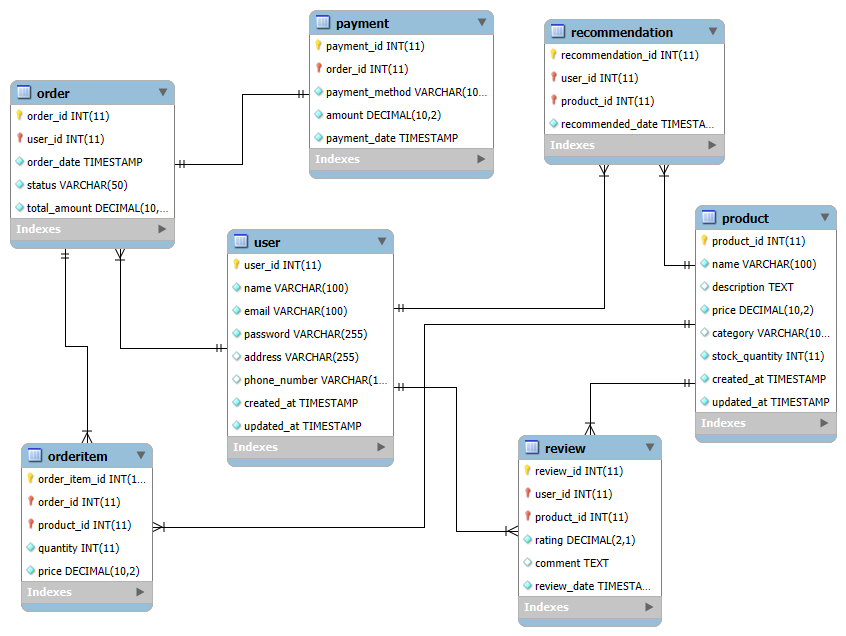





**Above is the ER diagram for the entities described involves visualizing the relationships and attributes that reflect the rationale behind the design.**

### Define Relationships
   - **User - Order**: One-to-Many (`user.user_id` -> `order.user_id`)
   - **Order - OrderItem**: One-to-Many (`order.order_id` -> `order_item.order_id`)
   - **Product - OrderItem**: One-to-Many (`product.product_id` -> `order_item.product_id`)
   - **User - Review**: One-to-Many (`user.user_id` -> `review.user_id`)
   - **Product - Review**: One-to-Many (`product.product_id` -> `review.product_id`)
   - **Order - Payment**: One-to-One (`order.order_id` -> `payment.order_id`)
   - **User - Recommendation**: One-to-Many (`user.user_id` -> `recommendation.user_id`)
   - **Product - Recommendation**: One-to-Many (`product.product_id` -> `recommendation.product_id`)





## **Step 8: Presentation of Findings**

### Presentation of Findings

In this case study, we dissected Amazon, a leading e-commerce platform, and designed a schema to reflect its core features. By examining real-world problems such as convenience, variety, and informed purchasing decisions, we showcased how Amazon's design addresses these issues effectively.

The schema design focuses on key entities like User, Product, Order, OrderItem, Review, Payment, and Recommendation, capturing the essential data structure that drives Amazon's functionalities. This design ensures that Amazon can efficiently manage its vast catalog, provide personalized experiences, and facilitate secure transactions.



----------------
##**Case Study questions**

In [ ]:
----------------------------------------------------------------------------------------------------------------------------------------------
/* --------------------
   Case Study Questions
   --------------------*/
-- 1. Retrieve the total number of users registered on the platform.
select count(distinct(name)) from User;

----------------------------------------------------------------------------------------------------------------------------------------------
-- 2. List all users who registered in the last month.
SELECT
    *
FROM
    User
WHERE
    MONTH(created_at) = 7;

----------------------------------------------------------------------------------------------------------------------------------------------
-- 3. Count the total number of products available in each category
SELECT
    category, COUNT(*) AS total_products
FROM
    Product
GROUP BY category;

----------------------------------------------------------------------------------------------------------------------------------------------
-- 4. Find the top 2 categories with the highest average product ratings.
SELECT
    category, ROUND(AVG(rating), 2) AS avg_rating
FROM
    Product
        INNER JOIN
    Review ON Product.product_id = Review.product_id
GROUP BY category
ORDER BY avg_rating DESC
LIMIT 2;

----------------------------------------------------------------------------------------------------------------------------------------------
-- 5.Identify category  with the highest number of reviews.
WITH cte AS (
    SELECT  p.product_id, p.category, p.name AS product_name, r.review_id, r.rating
    FROM Product p
    INNER JOIN Review r ON p.product_id = r.product_id
)
SELECT category,count(category) as no_of_review
FROM cte group by category
order by no_of_review desc
limit 1;

----------------------------------------------------------------------------------------------------------------------------------------------
 -- 6.Calculate the total revenue generated in the last quarter.
SELECT SUM(amount ) as total_reveniew
FROM payment
WHERE DATE(payment_date) >= DATE_SUB(NOW(), INTERVAL 3 MONTH)
AND payment_date < NOW();

----------------------------------------------------------------------------------------------------------------------------------------------
-- 7. List the top 3 best-selling products by reveniew.
select p.`name`, o.price from product p
inner join orderitem o on p.product_id = o.product_id order by o.price desc limit 3;

----------------------------------------------------------------------------------------------------------------------------------------------
 -- 8.Calculate the average rating for each product
WITH cte AS (
    SELECT  p.product_id, p.category, p.name AS product_name, r.review_id, r.rating
    FROM Product p
    INNER JOIN Review r ON p.product_id = r.product_id
)
select product_name, avg(rating) as avg_rating from cte
group by product_name ;

----------------------------------------------------------------------------------------------------------------------------------------------
-- 9.Identify users who have left the most reviews
 select u.name,count(u.name) as total_review from user u
 inner join review r on u.user_id = r.user_id group by u.name order by total_review desc;

 ----------------------------------------------------------------------------------------------------------------------------------------------
 -- 10. Count the number of orders paid using each payment method
SELECT payment_method, COUNT(*) AS order_count
FROM payment
GROUP BY payment_method;

----------------------------------------------------------------------------------------------------------------------------------------------
-- 11. Calculate the total amount processed through each payment method
select payment_method, sum(amount) from payment group by
payment_method;

----------------------------------------------------------------------------------------------------------------------------------------------
-- 12. List products that are frequently recommended to users
SELECT product_id, COUNT(*) AS recommendation_count
FROM recommendation
GROUP BY product_id
ORDER BY recommendation_count DESC;

----------------------------------------------------------------------------------------------------------------------------------------------
-- 13. Determine the average number of orders per user
SELECT
    o.user_id, u.name, COUNT(o.order_id)
FROM
    `order` o
        INNER JOIN
    `user` u ON o.user_id = u.user_id
GROUP BY u.name;


#**THANK YOU**